In [1]:
import pandas as pd

In [2]:
# 1. Carregar el dataset preprocessat
file_path = 'barcelona_compra_idealista_tags.csv'
data = pd.read_csv(file_path)

## Preprocessament

In [3]:
data

preu_actual preu_original descompte  \
0    2.450.000‚Ç¨   2.590.000 ‚Ç¨        5%   
1      750.000‚Ç¨     785.000 ‚Ç¨        4%   
2      765.000‚Ç¨           NaN        0%   
3    1.275.000‚Ç¨           NaN        0%   
4    1.350.000‚Ç¨   1.400.000 ‚Ç¨        4%   
..          ...           ...       ...   
295  1.175.000‚Ç¨           NaN        0%   
296    750.000‚Ç¨           NaN        0%   
297  2.000.000‚Ç¨           NaN        0%   
298    460.000‚Ç¨     478.000 ‚Ç¨        4%   
299  1.770.000‚Ç¨           NaN        0%   

                                                 titol  \
0    Pis a carrer de Val√®ncia, La Dreta de l'Eixamp...   
1    √Ätic a Gran Via de les Corts Catalanes, L'Anti...   
2        Pis a carrer de la Merc√®, El G√≤tic, Barcelona   
3          Pis a passeig de Colom, El G√≤tic, Barcelona   
4    Pis a passeig de Gr√†cia, La Dreta de l'Eixampl...   
..                                                 ...   
295  D√∫plex a carrer de Santa Anna, El G√≤tic, Barce...   
296  D√∫plex a carrer de El Escorial, Vila de Gr√†cia...   
297  Pis a Gran Via de les Corts Catalanes, La Dret...   
298        Pis a La Maternitat i Sant Ramon, Barcelona   
299  Pis a passeig de Garcia F√†ria, Diagonal Mar i ...   

                                               enlla√ß  \
0    https://www.idealista.com/ca/inmueble/105473433/   
1    https://www.idealista.com/ca/inmueble/103930029/   
2    https://www.idealista.com/ca/inmueble/106475860/   
3    https://www.idealista.com/ca/inmueble/106476051/   
4    https://www.idealista.com/ca/inmueble/105043094/   
..                                                ...   
295  https://www.idealista.com/ca/inmueble/105298934/   
296  https://www.idealista.com/ca/inmueble/101064998/   
297  https://www.idealista.com/ca/inmueble/102684456/   
298  https://www.idealista.com/ca/inmueble/104840329/   
299   https://www.idealista.com/ca/inmueble/97362092/   

                                            descripcio              agent_nom  \
0    Aquest incre√Øble habitatge reformat a estrenar...           Bcn Advisors   
1    Aquest meravell√≥s √†tic de 87 m2 constru√Øts int...           Bcn Advisors   
2    Apartament de luxe a Passeig de Colom amb vist...  Walter Haus Barcelona   
3    Exclusiu pis de 131 m¬≤ al Barri G√≤tic de Barce...  Walter Haus Barcelona   
4    Aquest pis de luxe es troba al Passeig de Gr√†c...           Bcn Advisors   
..                                                 ...                    ...   
295  Sensacional d√∫plex amb terrassa i elements ori...             Particular   
296  Aquest d√∫plex moblat amb pati es troba a la pa...             Particular   
297  Aquesta incre√Øble vivenda de 309 m2 constru√Øts...             Particular   
298  Pis ampli a reformar a Les Corts Engel & V√∂lke...             Particular   
299  Pis reformat de quatre habitacions, amb una su...             Particular   

            parking            tags  habs  metres2  
0        No indicat  Reformat, Luxe     4      253  
1        No indicat        Llumin√≥s     2       97  
2        No indicat   Vistes al mar     2      110  
3        No indicat   Vistes al mar     2      131  
4        No indicat        Llumin√≥s     3      115  
..              ...             ...   ...      ...  
295      No indicat        Llumin√≥s     3      258  
296      No indicat        Llumin√≥s     4      146  
297      No indicat  Llumin√≥s, Luxe     5      409  
298      No indicat        Reformat     3      115  
299  P√†rking incl√≤s            Luxe     4      169  

[300 rows x 11 columns]

In [4]:
# Si "preu_original" = NaN ; preu_original <- preu_actual
data['preu_original'] = data['preu_original'].fillna(data['preu_actual'])

In [5]:
data[['preu_actual', 'preu_original', 'habs', 'metres2']].describe()

habs     metres2
count  300.000000  300.000000
mean     3.720000  202.023333
std      1.354393  116.607865
min      1.000000   39.000000
25%      3.000000  121.750000
50%      4.000000  180.000000
75%      5.000000  246.500000
max      8.000000  832.000000

In [6]:
# Eliminem el simbol del euro (‚Ç¨) i els punts que separen els milers. Convertim a tipus num√®ric.
data['preu_actual'] = data['preu_actual'].replace(r'[‚Ç¨\.\s]', '', regex=True).astype(float)
data['preu_original'] = data['preu_original'].replace(r'[‚Ç¨\.\s]', '', regex=True).astype(float)

# Mirem els percentils 1 i 99 de les variables num√®riques.
percentile_01 = data[['preu_actual', 'preu_original', 'habs', 'metres2']].quantile(0.01)
percentile_99 = data[['preu_actual', 'preu_original', 'habs', 'metres2']].quantile(0.99)

# Trunquem aquests valors
for column in ['preu_actual', 'preu_original', 'habs', 'metres2']:
    data[column] = data[column].clip(lower=percentile_01[column], upper=percentile_99[column])

data[['preu_actual', 'preu_original', 'habs', 'metres2']].describe()

preu_actual  preu_original        habs     metres2
count  3.000000e+02   3.000000e+02  300.000000  300.000000
mean   1.423441e+06   1.433688e+06    3.710100  200.982067
std    8.793823e+05   8.830337e+05    1.326307  111.628379
min    3.249500e+05   3.299500e+05    1.000000   53.990000
25%    7.500000e+05   7.500000e+05    3.000000  121.750000
50%    1.272500e+06   1.275000e+06    4.000000  180.000000
75%    1.800000e+06   1.800000e+06    5.000000  246.500000
max    4.900500e+06   4.900500e+06    7.010000  631.550000

L‚Äôan√†lisi descriptiva de les dades mostra que el conjunt inclou 300 registres per a cadascuna de les variables analitzades. Pel que fa als preus, tant el preu actual com l‚Äôoriginal tenen mitjanes similars, al voltant d‚Äô1,4 milions d‚Äôeuros, cosa que reflecteix una estabilitat general en el valor de les propietats sense grans difer√®ncies entre el preu inicial i l‚Äôactual. La desviaci√≥ est√†ndard per als preus √©s elevada, al voltant dels 880.000 euros, la qual cosa indica una gran variabilitat en el conjunt de dades. Els valors m√≠nims dels preus, que es troben al voltant dels 325.000 euros, mostren l'exist√®ncia de propietats m√©s assequibles, mentre que els valors m√†xims, properes als 4,9 milions d‚Äôeuros, suggereixen la pres√®ncia de propietats de luxe que podrien influir significativament en les mitjanes. En relaci√≥ al nombre d‚Äôhabitacions, la mitjana √©s de 3,7 habitacions per propietat, amb una mediana de 4, fet que indica que la majoria de propietats tenen entre 3 i 4 habitacions. La variabilitat en aquesta caracter√≠stica √©s menor, amb un m√≠nim d‚Äôuna habitaci√≥ i un m√†xim de set, cosa que denota que les propietats estan m√©s concentrades en un rang moderat. Finalment, els metres quadrats tenen una mitjana de 201, amb una mediana de 180, fet que indica que la distribuci√≥ d‚Äôaquesta caracter√≠stica √©s lleugerament esbiaixada cap a valors m√©s alts. Els valors m√≠nims, de poc m√©s de 53 metres quadrats, reflecteixen l'exist√®ncia d‚Äôhabitatges m√©s petits, mentre que els m√†xims arriben a 631 metres quadrats. En conjunt, aquestes dades suggereixen un mercat immobiliari divers, amb una distribuci√≥ de caracter√≠stiques que inclou tant propietats assequibles i compactes com opcions m√©s grans i de luxe, tot i que amb una concentraci√≥ major en rangs intermedis.

## Data exploration

In [7]:
import matplotlib.pyplot as plt

# Creem una figura amb dues subgr√†fiques
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('Distribuci√≥ dels preus de les propietats', fontsize=16)

# Gr√†fica del preu actual
axes[0].hist(data['preu_actual'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribuci√≥ del preu actual')
axes[0].set_xlabel('Preu (‚Ç¨)')
axes[0].set_ylabel('Freq√º√®ncia')

# Gr√†fica del preu original
axes[1].hist(data['preu_original'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribuci√≥ del preu original')
axes[1].set_xlabel('Preu (‚Ç¨)')
axes[1].set_ylabel('Freq√º√®ncia')

# Ajustem el layout per evitar solapaments
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


A partir de les gr√†fiques, es pot observar que tant els preus actuals com els preus originals de les propietats tenen una distribuci√≥ similar, amb una concentraci√≥ elevada de propietats en la franja de preus m√©s baixos i una disminuci√≥ progressiva a mesura que els preus augmenten. Tamb√© es pot percebre que els preus m√©s alts formen una cua llarga en la distribuci√≥, suggerint que hi ha algunes propietats de preu molt elevat que poden influir en les estad√≠stiques agregades. Comparant ambdues distribucions, sembla que no hi ha grans difer√®ncies entre el preu original i el preu actual, el que podria suggerir que les variacions en el mercat immobiliari no s√≥n dr√†stiques en aquest conjunt de dades. 

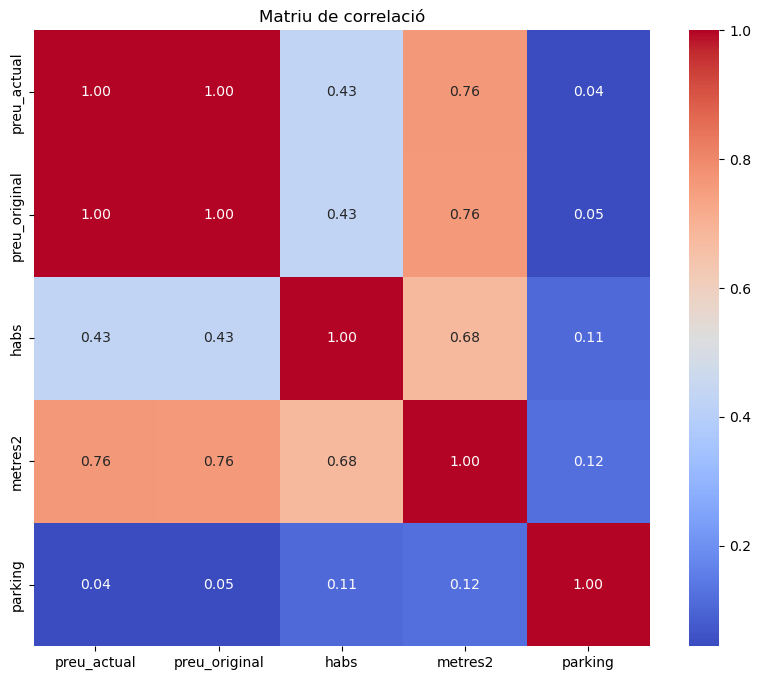

In [8]:
import seaborn as sns

data_encoded = data.copy()
data_encoded['parking'] = data_encoded['parking'].astype('category').cat.codes
correlation_matrix = data_encoded[['preu_actual', 'preu_original', 'habs', 'metres2', 'parking']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Matriu de correlaci√≥')
plt.show()

sns.pairplot(data_encoded[['preu_actual', 'preu_original', 'habs', 'metres2', 'parking']], diag_kind='kde')
plt.suptitle('Pairplot de les variables', y=1.02)
plt.show()

Pel que fa a la **matriu de correlaci√≥**, observem una correlaci√≥ gaireb√© perfecta (1.00) entre el preu actual i el preu original, fet que indica que no hi ha hagut canvis significatius en els preus en el temps. La variable metres2 mostra una correlaci√≥ forta (0.76) amb el preu actual i original, la qual cosa confirma que la mida de la propietat √©s un dels factors m√©s determinants en el preu. Tamb√© s'observa una correlaci√≥ moderada entre el nombre d‚Äôhabitacions (habs) i el preu (0.43), suggerint que el nombre d'habitacions influeix en el preu, tot i que no tant com la superf√≠cie. D‚Äôaltra banda, la variable parking presenta una correlaci√≥ molt baixa amb les altres variables, especialment amb el preu (0.04 per al preu actual), cosa que indica que la disponibilitat de places d‚Äôaparcament no √©s un factor clau en la determinaci√≥ del preu de les propietats. Pel que fa als preus actual i original, es confirma una relaci√≥ lineal gaireb√© perfecta, com ja s‚Äôobservava a la matriu de correlaci√≥. Aquesta correlaci√≥ √©s visible amb una l√≠nia pr√†cticament recta en el gr√†fic entre aquestes dues variables, fet que indica que qualsevol variaci√≥ en el preu actual sol anar de la m√† del preu original. La relaci√≥ entre el preu i els metres quadrats (metres2) tamb√© mostra una forta correlaci√≥ positiva, tal com es veu en la dispersi√≥ dels punts que segueixen una tend√®ncia ascendent clara: a m√©s metres quadrats, el preu tendeix a ser m√©s alt. Aquesta relaci√≥ √©s menys marcada en comparaci√≥ amb la correlaci√≥ entre els preus, per√≤ segueix sent significativa. Per contra, el nombre d‚Äôhabitacions (habs) no mostra una relaci√≥ tan evident amb el preu, ja que els punts estan m√©s dispersos. Malgrat aix√≤, es pot percebre una lleugera tend√®ncia a l‚Äôaugment de preu a mesura que creix el nombre d‚Äôhabitacions.

Quant als **pairplots**, veiem que la variable parking no t√© una correlaci√≥ significativa amb cap de les altres variables, ja que els punts es distribueixen de manera bastant aleat√≤ria en els gr√†fics corresponents. Aix√≤ refor√ßa la idea que la disponibilitat d‚Äôaparcament t√© un impacte m√≠nim en el preu de les propietats en aquest conjunt de dades. Per altra banda, les distribucions diagonals mostren que els preus i els metres quadrats tenen distribucions assim√®triques, amb una concentraci√≥ m√©s gran en valors m√©s baixos i una cua que s‚Äôest√©n cap als valors m√©s alts. 

## An√†lisi

In [9]:
# Eliminem preu actual i descripci√≥
data[['descripcio', 'preu_actual']].isnull().sum()

descripcio     2
preu_actual    0
dtype: int64

### Supervisat

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convertim l'etiqueta "parking" de categ√≤rica a num√®rica
encoder = LabelEncoder()
data['parking'] = encoder.fit_transform(data['parking'])

# Pel model supervisat, separem la variable objectiu.
features = data[['habs', 'metres2', 'parking']]
target = data['preu_actual']

# Separem el conjunt en entrenament i testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Estandaritzem les caracter√≠stiques d'entrenament
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fem servir un model de regressi√≥ lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 438268.91749361734


In [11]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# M√®triques addicionals
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R¬≤: {r2}")
print(f"MAE: {mae}")

# Validaci√≥ creuada
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores.mean()) ** 0.5
print(f"Cross-validated RMSE: {cv_rmse}")

# Import√†ncia de les caracter√≠stiques
importance = lr_model.coef_
feature_importance = pd.DataFrame({'Caracter√≠stica': X_train.columns, 'Import√†ncia': importance})
print("Import√†ncia de les caracter√≠stiques:")
print(feature_importance)

# Visualitzaci√≥ de la import√†ncia
import matplotlib.pyplot as plt
feature_importance.sort_values(by='Import√†ncia', ascending=False, inplace=True)
plt.barh(feature_importance['Caracter√≠stica'], feature_importance['Import√†ncia'])
plt.xlabel('Import√†ncia')
plt.ylabel('Caracter√≠stica')
plt.title('Import√†ncia de les caracter√≠stiques en la regressi√≥ lineal')
plt.show()

R¬≤: 0.6824747519908374
MAE: 337364.48878332163
Cross-validated RMSE: 592412.7074489562
Import√†ncia de les caracter√≠stiques:
  Caracter√≠stica    Import√†ncia
0           habs -149443.087099
1        metres2  778961.953270
2        parking  -24290.793468


Pel que fa a les m√®triques, el coeficient de determinaci√≥ indica que el model explica un 68'2% de la variabilitat en els preus, un resultat acceptable tot i que hi ha marge de millora. L'error mitj√† absolut suggereix que, de mitjana, el model s'equivoca en 337.364 euros, mentre que el RMSE m√©s elevat (438.268) reflecteix que hi ha errors significatius en algunes prediccions. Analitzant la import√†ncia de les caracter√≠stiques, s'observa que els metres quadrats tenen el major impacte positiu en el preu, fet esperable ja que les propietats m√©s grans solen tenir un valor m√©s alt. D'altra banda, el nombre d'habitacions presenta un efecte sorprenentment negatiu, cosa que podria indicar la pres√®ncia de correlacions no evidents al conjunt de dades, com ara la relaci√≥ entre m√©s habitacions i menys metres quadrats o ubicacions menys valorades. La variable p√†rquing, tot i tenir una influ√®ncia menor, tamb√© mostra un impacte negatiu, fet que podria significar que no √©s un factor determinant en el preu o que es correlaciona amb altres variables no considerades. 

### No supervisat

Ara farem la prova del colze per determinar el nombre √≤ptim de cl√∫sters:

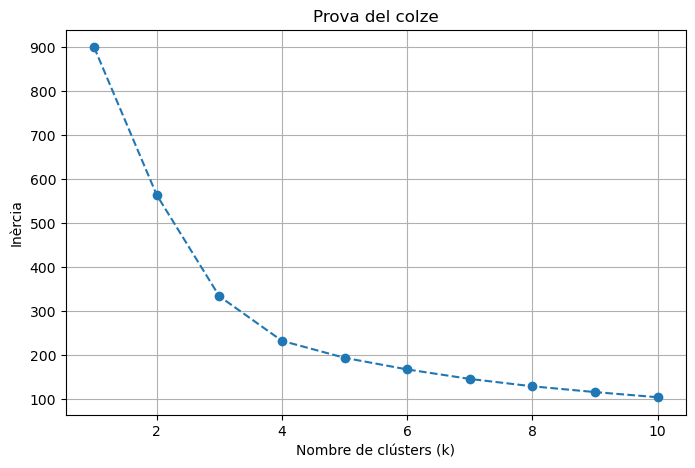

In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escalar les dades
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)  # 'features' √©s la teva matriu de caracter√≠stiques

# Prova del colze
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualitzaci√≥ de la prova del colze
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Prova del colze')
plt.xlabel('Nombre de cl√∫sters (k)')
plt.ylabel('In√®rcia')
plt.grid(True)
plt.show()


Com es pot observar, la in√®rcia disminueix de manera significativa a mesura que augmenta el nombre de cl√∫sters, per√≤ el decreixement es redueix notablement a partir de k=3 o k=4. Aquest punt d'inflexi√≥ o colze, suggereix que el nombre √≤ptim de cl√∫sters pot estar al voltant de 3 o 4. Aquesta elecci√≥ ofereix un bon comprom√≠s entre la simplificaci√≥ del model i la reducci√≥ de l'error intra-cl√∫ster, ja que una selecci√≥ de k m√©s gran augmentaria la complexitat del model sense una millora significativa en la reducci√≥ de la in√®rcia, mentre que una selecci√≥ m√©s petita podria no capturar adequadament les estructures subjacents de les dades. Per confirmar aquesta interpretaci√≥, complementarem la prova del colze amb la silhouette score, per validar si k=3 o k=4 √©s realment el m√©s adequat per a les dades.

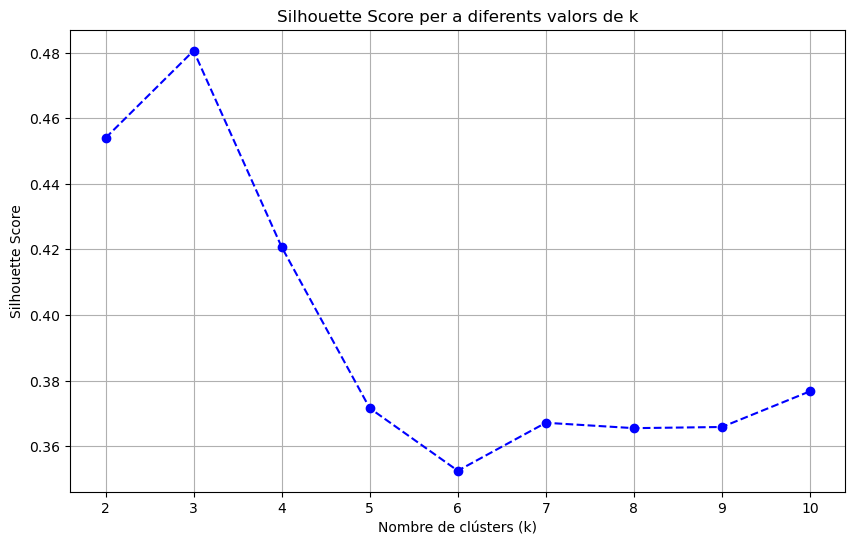

In [13]:
from sklearn.metrics import silhouette_score

# Calcular la Silhouette Score per diferents valors de k
silhouette_scores = []
range_n_clusters = range(2, 11)  # Es prova de k=2 fins a k=10

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

# Visualitzar els resultats
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score per a diferents valors de k')
plt.xlabel('Nombre de cl√∫sters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()



A partir de la gr√†fica de la Silhouette Score per a diferents valors de k, podem observar que el valor m√©s alt de la Silhouette Score es troba quan k=3, amb una puntuaci√≥ de 0.48. Per tant, entre els valors analitzats, el nombre √≤ptim de cl√∫sters √©s 3, ja que en aquest punt els cl√∫sters s√≥n m√©s compactes i ben separats.

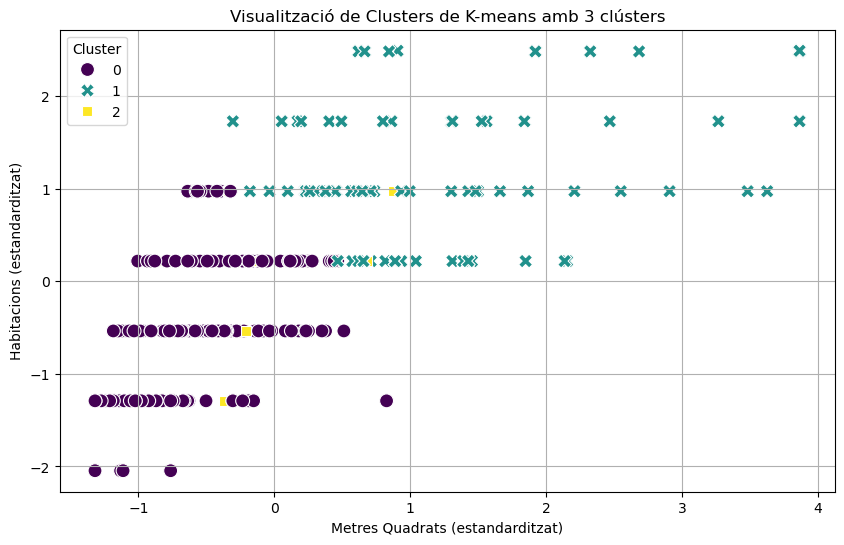

In [14]:
import os

# Limitem per evitar problemes de mem√≤ria
os.environ["OMP_NUM_THREADS"] = "2"

# K-means clustering amb 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

data['Cluster'] = clusters

plot_data = pd.DataFrame(data_scaled, columns=['habs', 'metres2', 'parking'])
plot_data['Cluster'] = data['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='metres2', y='habs', hue='Cluster', data=plot_data, palette='viridis', style='Cluster', s=100)
plt.title('Visualitzaci√≥ de Clusters de K-means amb 3 cl√∫sters')
plt.xlabel('Metres Quadrats (estandarditzat)')
plt.ylabel('Habitacions (estandarditzat)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Com podem veure, el 3r cl√∫ster (representat per quadrats de color groc) no est√† agrupat, sin√≥ que t√© els valors dispersos entre els altres 2 cl√∫sters. Fem ara una reducci√≥ de la dimensionalitat i provem amb diferents nombres de cl√∫sters.

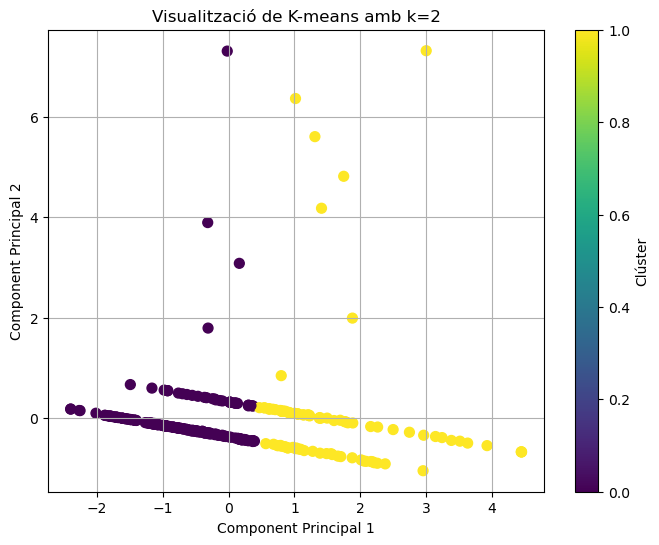

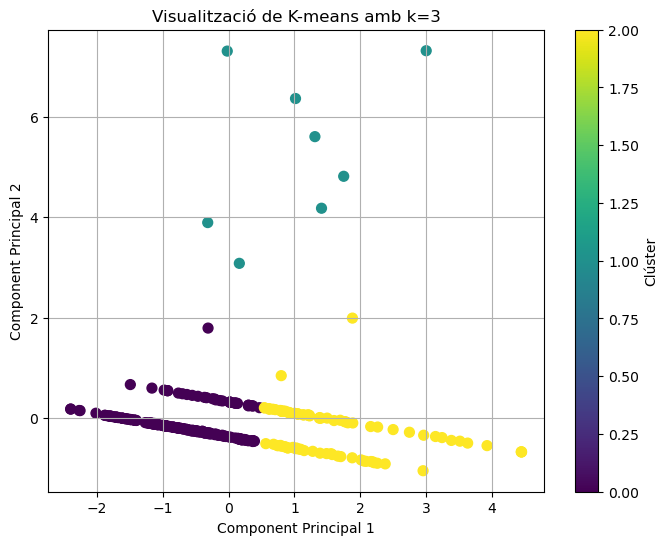

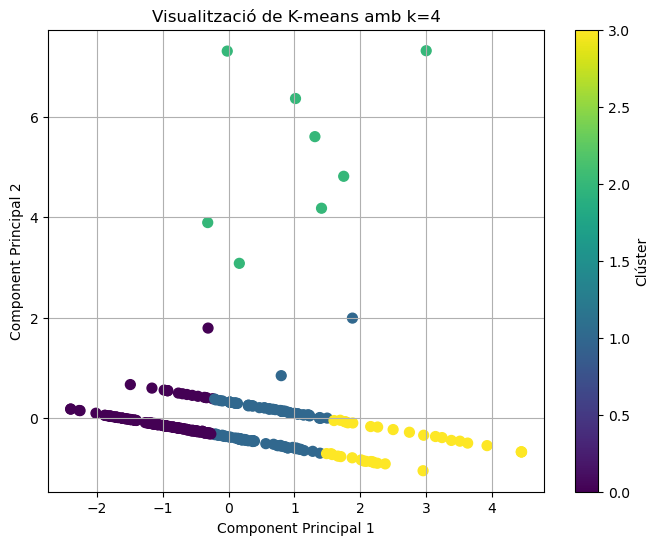

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reduir dimensionalitat amb PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualitzar K-means amb diferents nombres de cl√∫sters
for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_pca)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(f'Visualitzaci√≥ de K-means amb k={k}')
    plt.xlabel('Component Principal 1')
    plt.ylabel('Component Principal 2')
    plt.grid(True)
    plt.colorbar(label='Cl√∫ster')
    plt.show()


Com pode veure als 3 gr√†fics, l'augment del nombre de cl√∫sters a ùëò_3 i k=4 no ofereix una millora en la cohesi√≥ visual ni una separaci√≥ clara entre els grups, ja que alguns cl√∫sters resultants es mostren dispersos i sense una agrupaci√≥ significativa. Per aquest motiu, probarem l'algoritme DBSCAN, ja que aquest √©s m√©s adequat per detectar estructures no lineals i pot identificar punts sorollosos o anomalies que K-means no gestiona correctament.

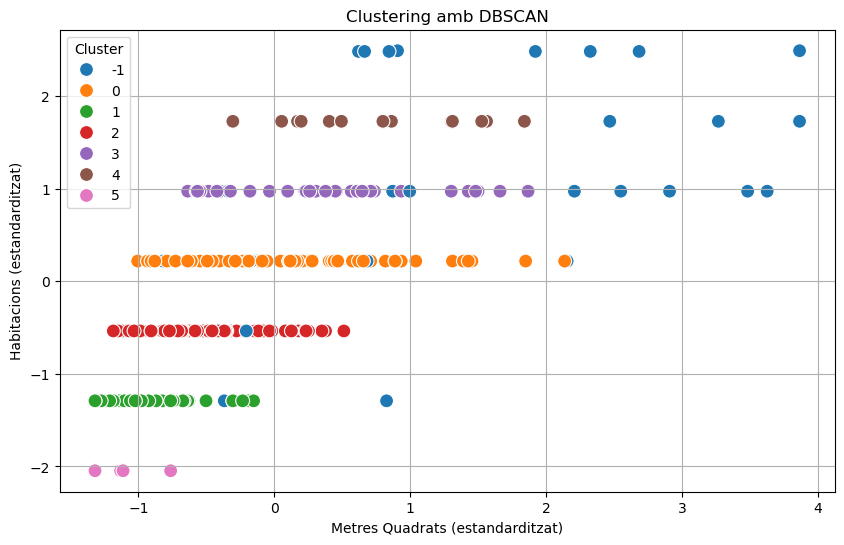

Nombre de punts per cl√∫ster:  2    86
 0    72
 1    47
 3    44
-1    31
 4    15
 5     5
dtype: int64
Punts classificats com a soroll (outliers): 31


In [16]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustem els par√†metres eps i min_samples 
# eps √©s el radi de la densitat i min_samples √©s el nombre m√≠nim de punts necessaris per formar un cl√∫ster
dbscan = DBSCAN(eps=0.7, min_samples=5)

# Apliquem DBSCAN a les dades escalades
clusters = dbscan.fit_predict(data_scaled)

# Afegim els resultats al Dataframe original
data['Cluster'] = clusters

# Visualitzaci√≥ dels cl√∫sters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='metres2', y='habs',
    hue='Cluster',
    data=pd.DataFrame(data_scaled, columns=['habs', 'metres2', 'parking']).assign(Cluster=clusters),
    palette='tab10',
    s=100
)
plt.title('Clustering amb DBSCAN')
plt.xlabel('Metres Quadrats (estandarditzat)')
plt.ylabel('Habitacions (estandarditzat)')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

# Comptem els punts classificats i els "outliers" (cl√∫ster -1)
print(f"Nombre de punts per cl√∫ster: {pd.Series(clusters).value_counts()}")
print(f"Punts classificats com a soroll (outliers): {(clusters == -1).sum()}")


L'aplicaci√≥ de DBSCAN ha produ√Øt una distribuci√≥ m√©s natural dels cl√∫sters, amb cinc grups principals i un conjunt significatiu de punts classificats com a soroll (outliers). Els punts classificats com a soroll (40 en total) s√≥n aquells que no compleixen els criteris de densitat m√≠nima especificats per eps=0.7 i min_samples=7. Per aconseguir aquesta configuraci√≥, hem provat diferents valors de eps i min_samples per trobar la combinaci√≥ que produ√≠s la millor diferenciaci√≥ dels grups. Aquesta classificaci√≥ d'outliers pot ser √∫til per identificar propietats que no s'ajusten als patrons generals de la resta del conjunt de dades. Els resultats indiquen que DBSCAN ofereix una millor diferenciaci√≥ dels grups en comparaci√≥ amb K-means, sobretot per a dades que no s√≥n linealment separables o que contenen punts dispersos.

A partir d'aqui, podr√≠em analitzar el resum estad√≠stic de cada cl√∫ster i visualitzar-ne els patrons:

In [17]:
# Resum estad√≠stic per cl√∫ster
cluster_summary = data.groupby('Cluster').agg({
    'habs': ['mean', 'std', 'min', 'max'],
    'metres2': ['mean', 'std', 'min', 'max'],
    'parking': ['mean', 'std', 'min', 'max'],
    'preu_actual': ['mean', 'std', 'min', 'max']
})
print(cluster_summary)


             habs                          metres2                      \
             mean       std  min   max        mean         std     min   
Cluster                                                                  
-1       5.097742  1.739963  2.0  7.01  376.698387  174.526912   86.00   
 0       4.000000  0.000000  4.0  4.00  215.652778   75.814481   89.00   
 1       2.000000  0.000000  2.0  2.00  111.212553   41.113051   53.99   
 2       3.000000  0.000000  3.0  3.00  149.162791   46.916161   69.00   
 3       5.000000  0.000000  5.0  5.00  237.522727   74.617938  130.00   
 4       6.000000  0.000000  6.0  6.00  280.533333   76.513180  167.00   
 5       1.000000  0.000000  1.0  1.00   75.196000   25.335983   53.99   

                  parking                     preu_actual                \
            max      mean       std min max          mean           std   
Cluster                                                                   
-1       631.55  2.838710  3.68869

L'an√†lisi dels resultats mostra difer√®ncies significatives entre els cl√∫sters i els punts classificats com a soroll. Els outliers, agrupats sota el cl√∫ster -1, presenten una mitjana de metres quadrats elevada amb una gran dispersi√≥, indicant propietats at√≠piques pel que fa a la mida. Aquestes propietats tamb√© tenen una mitjana d‚Äôhabitacions superior als altres grups, suggerint que es tracta de cases grans o luxoses. El preu mitj√† d'aquestes propietats √©s notablement superior, fet que refor√ßa la hip√≤tesi que es tracta de casos excepcionals. Els altres cl√∫sters mostren patrons m√©s coherents i uniformes. Per exemple, el cl√∫ster 0 representa propietats amb quatre habitacions, una mida mitjana de 215 metres quadrats i preus relativament alts, indicant un perfil d‚Äôhabitatges m√©s estandarditzat per√≤ amb cert valor al mercat. En canvi, el cl√∫ster 1 mostra propietats m√©s petites, amb una mitjana de dues habitacions i una mida al voltant de 111 metres quadrats, amb preus notablement m√©s baixos, reflectint possiblement habitatges m√©s accessibles. El cl√∫ster 2 presenta una combinaci√≥ de tres habitacions i una mida de 149 metres quadrats, amb preus intermedis, indicant un segment que podria representar propietats de mida mitjana. El cl√∫ster 4, tot i tenir una mida mitjana superior als altres, mant√© preus comparables als cl√∫sters 2 i 3, suggerint que altres factors m√©s enll√† de la mida poden influir en el valor. Finalment, el cl√∫ster 5 es caracteritza per propietats petites, amb una habitaci√≥ i mides molt redu√Ødes, amb un preu que √©s el m√©s baix de tots els grups, reflectint habitatges probablement destinats a p√∫blics amb menys capacitat adquisitiva. Aquestes difer√®ncies evidencien la diversitat dins del conjunt de dades i apunten cap a segments clarament definits en funci√≥ de les caracter√≠stiques f√≠siques de les propietats i el seu preu al mercat.

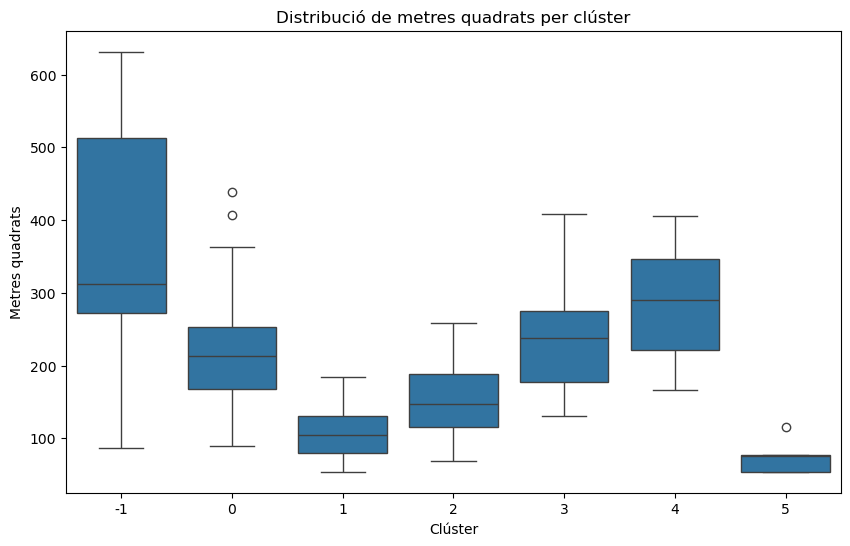

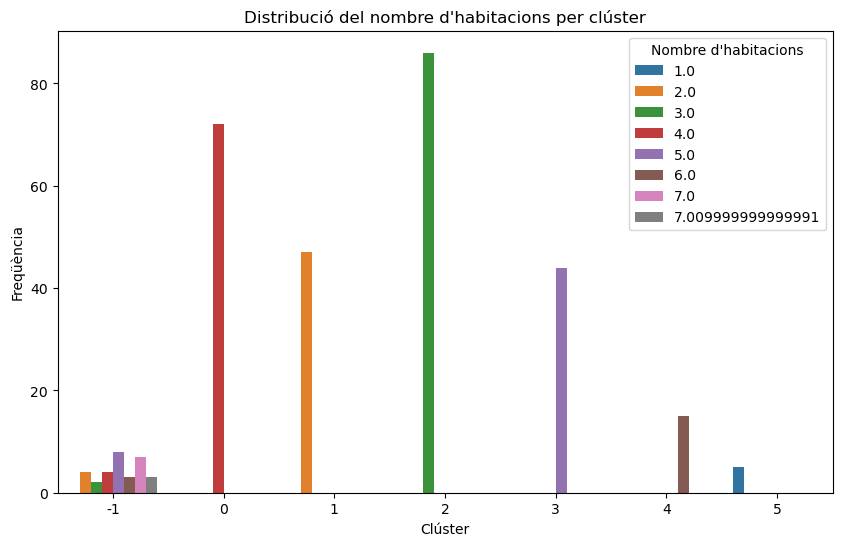

In [18]:
# Boxplot de metres quadrats per cl√∫ster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='metres2', data=data)
plt.title('Distribuci√≥ de metres quadrats per cl√∫ster')
plt.xlabel('Cl√∫ster')
plt.ylabel('Metres quadrats')
plt.show()

# Histograma del nombre d'habitacions per cl√∫ster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='habs', data=data, palette='tab10')
plt.title('Distribuci√≥ del nombre d\'habitacions per cl√∫ster')
plt.xlabel('Cl√∫ster')
plt.ylabel('Freq√º√®ncia')
plt.legend(title='Nombre d\'habitacions')
plt.show()

Per una banda, el gr√†fic de distribuci√≥ de metres quadrats per cl√∫ster ens mostra com els punts classificats com a soroll (cl√∫ster -1) presenten una gran variabilitat, amb valors significativament m√©s elevats en comparaci√≥ amb els altres grups, cosa que indica que aquestes propietats s√≥n substancialment m√©s grans i no segueixen els patrons generals. El cl√∫ster 0 mostra una mida mitjana inferior als outliers per√≤ amb una distribuci√≥ m√©s controlada, reflectint habitatges m√©s homogenis. El cl√∫ster 1 t√© la mida m√©s redu√Øda, representant propietats petites, probablement apartaments o pisos econ√≤mics. Els cl√∫sters 2, 3 i 4 presenten una progressi√≥ en la mida mitjana, indicant diferents segments de propietats amb caracter√≠stiques creixents en termes de metres quadrats. El cl√∫ster 5, per contra, cont√© propietats petites amb molt poca variabilitat, fet que podria reflectir un grup d‚Äôhabitatges amb caracter√≠stiques molt similars.

El gr√†fic de freq√º√®ncies de nombre d'habitacions per cluster reflecteix difer√®ncies significatives entre els grups. El cl√∫ster 0 est√† dominat per propietats amb 4 habitacions, indicant un perfil d'habitatge familiar. El cl√∫ster 1 est√† format principalment per propietats amb 2 habitacions, probablement apartaments m√©s petits i enfocats a parelles o individus. El cl√∫ster 2 es caracteritza per habitatges amb 3 habitacions, que podrien representar una mida interm√®dia entre els apartaments i les cases familiars. Al cl√∫ster 3, les propietats amb 5 habitacions s√≥n predominants, suggerint espais m√©s grans, possiblement cases adossades o unifamiliars. El cl√∫ster 4 cont√© propietats amb 6 habitacions, reflectint habitatges molt amplis, i el cl√∫ster 5, tot i ser petit, est√† compost per habitatges amb nom√©s 1 habitaci√≥, indicant estudis o petits apartaments. Els punts classificats com a soroll (-1) mostren una distribuci√≥ dispersa, amb una varietat d'habitacions que van des d'1 fins a 7, indicant que no segueixen un patr√≥ clar i podrien ser propietats at√≠piques o excepcionals. 

Farem tamb√© una comparativa amb els outliers:

In [19]:
outliers = data[data['Cluster'] == -1]

# Resum estad√≠stic dels outliers
outliers_summary = outliers[['habs', 'metres2', 'parking', 'preu_actual']].describe()
print("Estad√≠stiques dels outliers:")
print(outliers_summary)


Estad√≠stiques dels outliers:
            habs     metres2    parking   preu_actual
count  31.000000   31.000000  31.000000  3.100000e+01
mean    5.097742  376.698387   2.838710  2.289661e+06
std     1.739963  174.526912   3.688692  1.194429e+06
min     2.000000   86.000000   0.000000  6.800000e+05
25%     4.000000  272.500000   0.500000  1.315000e+06
50%     5.000000  312.000000   1.000000  1.995000e+06
75%     7.000000  512.500000   4.500000  3.000000e+06
max     7.010000  631.550000  12.000000  4.900500e+06


L'an√†lisi estad√≠stica dels punts classificats com a outliers revela caracter√≠stiques destacades en relaci√≥ amb la resta del conjunt de dades. La mitjana del nombre d'habitacions en aquests outliers √©s de 5,09, amb un rang que oscil¬∑la entre 2 i 7, cosa que suggereix que sovint s√≥n propietats de mida considerable. Pel que fa als metres quadrats, la mitjana √©s elevada, 376,69 m¬≤, amb un m√†xim de 631,55 m¬≤, indicant que aquests punts tendeixen a representar propietats molt espaioses. En termes de places d'aparcament, la mitjana √©s de 2,83, amb un m√†xim de 12, cosa que suggereix que moltes d'aquestes propietats tenen un alt nombre de places, fet poc habitual. Finalment, el preu actual mitj√† d'aquestes propietats √©s de 2.289.661 ‚Ç¨, amb un m√†xim que arriba als 4.900.500 ‚Ç¨, demostrant que es tracta majorit√†riament de propietats molt exclusives i amb un valor elevat. Aquestes caracter√≠stiques indiquen que els outliers solen ser propietats de luxe o amb caracter√≠stiques √∫niques que no encaixen en cap dels cl√∫sters principals definits pel model DBSCAN.

### Test d'hip√≤tesi

Contrast d'hip√≤tesi per veure si hi ha difer√®ncies estad√≠sticament significatives en els preus entre els grups de propietats amb i sense parking.

1. Comprovar la normalitat de les distribucions dels preus.

In [20]:
from scipy.stats import shapiro

prices_with_parking = data[data['parking'] != 0]['preu_actual']
prices_without_parking = data[data['parking'] == 0]['preu_actual']

# Test Shapiro-Wilk
normality_test_with = shapiro(prices_with_parking)
normality_test_without = shapiro(prices_without_parking)

normality_test_with, normality_test_without

(ShapiroResult(statistic=0.8671867847442627, pvalue=9.804563205761951e-08),
 ShapiroResult(statistic=0.8700813055038452, pvalue=3.022572643562871e-12))

Els valors p s√≥n significativament menors que 0.05. Per tant,  rebutgem la hip√≤tesi nul¬∑la que les dades provenen d'una distribuci√≥ normal. Les distribucions dels preus tant per a propietats amb parking com sense no s√≥n normals.

Prova de Mann-Whitney

In [21]:
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(prices_with_parking, prices_without_parking, alternative='two-sided')

u_statistic, p_value

(13606.0, 3.121157841459005e-08)

El valor p √©s molt petit (significativament menor que 0.05). Per tant, hi ha difer√®ncies estad√≠sticament significatives entre els preus de les propietats amb parking i aquelles sense parking.

### MLP

In [23]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_model.predict(X_test_scaled)

import numpy as np

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)

r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

print("----- MLP Regressor -----")
print(f"MSE: {mse_mlp}")
print(f"RMSE: {rmse_mlp}")
print(f"R¬≤ : {r2_mlp}")
print(f"MAE: {mae_mlp}")

----- MLP Regressor -----
MSE: 2437648600171.1616
RMSE: 1561297.0890164247
R¬≤ : -3.029656448984312
MAE: 1362528.4474368247


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid_mlp = {
    'hidden_layer_sizes': [(64,), (64,32), (128,64)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'lbfgs'],
    'max_iter': [500, 1000]
}

mlp = MLPRegressor(random_state=42)

grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search_mlp.fit(X_train_scaled, y_train)
print("Millors hiperpar√†metres (MLP):", grid_search_mlp.best_params_)

best_mlp = grid_search_mlp.best_estimator_
y_pred_best_mlp = best_mlp.predict(X_test_scaled)

mse_best_mlp = mean_squared_error(y_test, y_pred_best_mlp)
rmse_best_mlp = np.sqrt(mse_best_mlp)

r2_best_mlp = r2_score(y_test, y_pred_best_mlp)
mae_best_mlp = mean_absolute_error(y_test, y_pred_best_mlp)

print("----- MLP Regressor (Millor model) -----")
print(f"MSE: {mse_best_mlp}")
print(f"RMSE: {rmse_best_mlp}")
print(f"R¬≤ : {r2_best_mlp}")
print(f"MAE: {mae_best_mlp}")

Millors hiperpar√†metres (MLP): {'activation': 'tanh', 'hidden_layer_sizes': (64,), 'max_iter': 500, 'solver': 'lbfgs'}
----- MLP Regressor (Millor model) -----
MSE: 289860007740.9927
RMSE: 538386.4854739509
R¬≤ : 0.5208348531391608
MAE: 429958.3350933708


El primer model presenta un valor de R¬≤ negatiu i un RMSE elevat, despr√©s de la busca d'hiperpar√†metres el R¬≤ ha canviat a 0.52 i el RMSE a 538386, reduint molt l'error. El model que ha donat millors resultats fa servir:
- capa d'activaci√≥ tanh
- capa oculta de 64 neurones
- m√†xim de 500 iteracions
- optimitzador lbfgs

## Conclusions

El model de Perceptr√≥ Multicapa (MLP) amb hiperpar√†metres optimitzats ha demostrat ser notablement superior als models inicials de regressi√≥ lineal, millorant el coeficient de R¬≤ a 0.52 i redu√Øt l'error quadr√†tic mitj√†, mostrant una millora significativa en la capacitat de predir el preu de les propietats.

L'an√†lisi descriptiva de les dades ha revelat una variabilitat considerable en el preu de les propietats, amb una mitjana al voltant d‚Äô1,4 milions d'euros i una desviaci√≥ est√†ndard alta. Aix√≤ indica que, tot i una estabilitat aparent en els preus entre el valor original i l'actual, la pres√®ncia de propietats de luxe amb preus molt elevats pot estar distorsionant aquesta percepci√≥ de estabilitat. A m√©s, els metres quadrats han emergit com el factor m√©s determinat del preu, mentre que el nombre d'habitacions i la disponibilitat de p√†rquing semblen tenir un impacte menor.

L'aplicaci√≥ de t√®cniques de clustering, particularment l'√∫s de l'algoritme DBSCAN, ha perm√®s una millor diferenciaci√≥ i identificaci√≥ de propietats at√≠piques o outliers. Aquest enfocament ha resultat ser m√©s adequat que el K-means per a aquestes dades, suggerint que algunes propietats no segueixen els patrons t√≠pics i poden necessitar una an√†lisi m√©s espec√≠fica.

De cara al futur, seria recomanable explorar altres models, que podrien manejar millor la complexitat i la variabilitat dels dades. A m√©s, una optimitzaci√≥ m√©s profunda i √†mplia dels hiperpar√†metres podria proporcionar millores addicionals en la precisi√≥ dels models. Tamb√©, ampliar el volum de dades o aplicar t√®cniques d'augment de dades podria ajudar a millorar la generalitzaci√≥ dels models i reduir el risc de sobreajustament. Finalment, seria √∫til realitzar una an√†lisi m√©s granular de l'impacte de les caracter√≠stiques menys influents, com el nombre d'habitacions o la disponibilitat de p√†rquing, per entendre millor la seva relaci√≥ amb el preu de les propietats dins diferents contextos o ubicacions. Aquestes accions no nom√©s podrien millorar la precisi√≥ dels models actuals, sin√≥ tamb√© proporcionar una comprensi√≥ m√©s profunda de la din√†mica del mercat immobiliari.